In [1]:
#import packages
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from ta import add_all_ta_features # Library that does financial technical analysis 

#to plot within notebook
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
# Importing the training set
df = pd.read_csv('Data/WAFA-ASSURANCE.csv', index_col="Date", parse_dates=True)

# Add all technical analysis to the dataframe we've already loaded
df = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

target_col = 'Close'

C:\Users\bentaleb.khalid\Anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\bentaleb.khalid\Anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


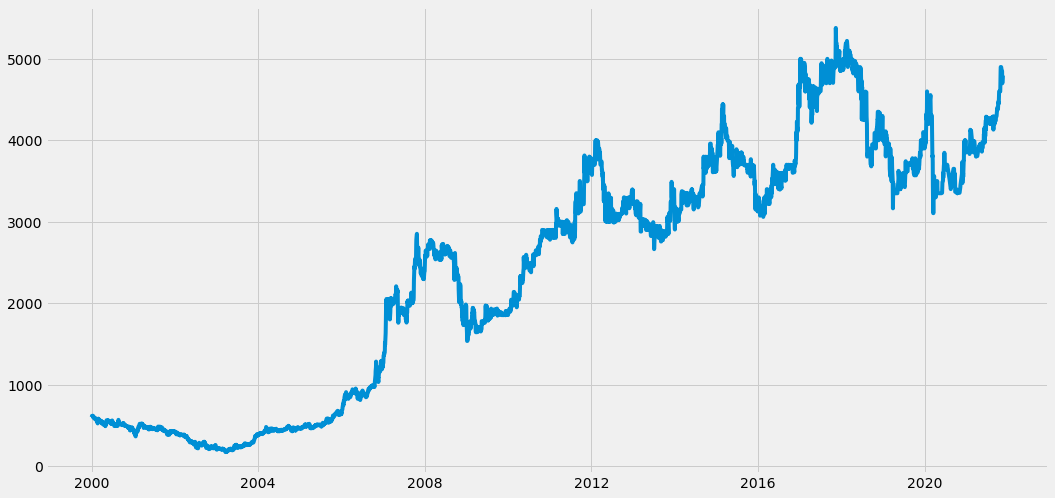

In [3]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df[target_col], label='Close Price history')

In [4]:
from sklearn.model_selection import train_test_split
# Split data into testing and training sets
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=False)

# Random Forest

In [5]:
# Random Forest Function
def RandomForest_fnc(X_train, y_train, X_test, y_test):
    # inputs: x train data, y train data, x test data, y test data (all dataframe's)
    # output: the predicted values for the test data (list)
    
    #scaling data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    regressorRandomForest = RandomForestRegressor(n_estimators = 1000, random_state = 0)
    regressorRandomForest.fit(X_train, y_train)
    rf_pred = regressorRandomForest.predict(X_test)
    
    rf_MSE = mean_squared_error(y_test, rf_pred)
    rf_MAE = mean_absolute_error(y_test, rf_pred)
    rf_RMSE = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(rf_pred)),2)))
    print('Random Forest Mean Absolute Error: {}'.format(rf_MAE))
    print('Random Forest MSE: {}'.format(rf_MSE))
    print('Random Forest RMSE: {}'.format(rf_RMSE))

    return regressorRandomForest, rf_pred, rf_MSE, rf_MAE, rf_RMSE

In [6]:
regressorRandomForest, rf_pred, rf_MSE, rf_MAE, rf_RMSE = RandomForest_fnc(X_train, y_train, X_test, y_test)

Random Forest Mean Absolute Error: 153.37801743462018
Random Forest MSE: 81745.94403904109
Random Forest RMSE: 285.9124761864041


# Support Vector Regression

In [7]:
# SVR Function
def SVR_func(X_train, y_train, X_test, y_test):
    #scaling data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    regressorSVR = SVR(kernel= 'linear', C= 1e3, gamma= 0.1)
    regressorSVR.fit(X_train,y_train)
    svr_pred = regressorSVR.predict(X_test)
    
    svr_MSE = mean_squared_error(y_test, svr_pred)
    svr_MAE = mean_absolute_error(y_test, svr_pred)
    svr_RMSE = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(svr_pred)),2)))
    print('Support Vector Regression Mean Absolute Error: {}'.format(svr_MAE))
    print('Support Vector Regression MSE: {}'.format(svr_MSE))
    print('Support Vector Regression RMSE: {}'.format(svr_RMSE))
    
    return regressorSVR, svr_pred, svr_MSE, svr_MAE, svr_RMSE

In [8]:
regressorSVR, svr_pred, svr_MSE, svr_MAE, svr_RMSE = SVR_func(X_train, y_train, X_test, y_test)

Support Vector Regression Mean Absolute Error: 0.6646334572564906
Support Vector Regression MSE: 3.0434533096561447
Support Vector Regression RMSE: 1.7445496008013486


# k-Nearest Neighbours

In [9]:
# KNN Function
def KNN_func(X_train, y_train, X_test, y_test):
    #scaling data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #using gridsearch to find the best parameter
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    regressorKNN = neighbors.KNeighborsRegressor()
    modelKNN = GridSearchCV(regressorKNN, params, cv=5)

    #fit the model and make predictions
    modelKNN.fit(X_train,y_train)
    knn_pred = modelKNN.predict(X_test)
    
    knn_MSE = mean_squared_error(y_test, knn_pred)
    knn_MAE = mean_absolute_error(y_test, knn_pred)
    knn_RMSE = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(knn_pred)),2)))
    print('k-Nearest Neighbours Mean Absolute Error: {}'.format(knn_MAE))
    print('k-Nearest Neighbours MSE: {}'.format(knn_MSE))
    print('k-Nearest Neighbours RMSE: {}'.format(knn_RMSE))
    
    return modelKNN, knn_pred, knn_MSE, knn_MAE, knn_RMSE

In [ ]:
modelKNN, knn_pred, knn_MSE, knn_MAE, knn_RMSE = KNN_func(X_train, y_train, X_test, y_test)

In [ ]:
# Function to make the plots
def PlotModelResults(dataset_train, dataset_test, pred, title):
    dataset_test['Predictions'] = 0
    dataset_test['Predictions'] = pred

    dataset_test.index = X_test.index
    dataset_train.index = X_train.index

    plt.figure(figsize=(16,8))
#     plt.plot(train['Close'], label='Train Actual')
    plt.plot(dataset_test['Close'], label='Test Actual')
    plt.plot(dataset_test['Predictions'], label='Our Prediction')
    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Price')
    plt.legend(loc='best')

In [ ]:
dataset_train = df[:int(df.shape[0]*0.8)]
dataset_test = df[int(df.shape[0]*0.8):]

knn_pred = pd.Series(index=y_test.index, data=knn_pred)
rf_pred = pd.Series(index=y_test.index, data=rf_pred)
svr_pred = pd.Series(index=y_test.index, data=svr_pred)

In [ ]:
PlotModelResults(dataset_train, dataset_test, rf_pred, 'Stock Price Random Forest')

In [ ]:
PlotModelResults(dataset_train, dataset_test, knn_pred, 'Stock Price k-Nearest Neighbours')

In [ ]:
PlotModelResults(dataset_train, dataset_test, svr_pred, 'Stock Price SVR')

In [ ]:
result = pd.concat([y_test, rf_pred, svr_pred, knn_pred], axis=1)
result.rename(columns={result.columns[0]:'Close Test'}, inplace=True)
result.rename(columns={result.columns[1]:'Close RF'}, inplace=True)
result.rename(columns={result.columns[2]:'Close SVR'}, inplace=True)
result.rename(columns={result.columns[3]:'Close KNN'}, inplace=True)

In [ ]:
result

In [ ]:
#result.to_excel("result_rf_mlp_knn.xlsx")

In [ ]:
rf_MAPE = mean_absolute_percentage_error(result["Close Test"], result["Close RF"])
svr_MAPE = mean_absolute_percentage_error(result["Close Test"], result["Close SVR"])
knn_MAPE = mean_absolute_percentage_error(result["Close Test"], result["Close KNN"])

In [ ]:
cnames=['RF', 'SVR', 'KNN']
finalResult = pd.DataFrame(columns=cnames, index=["MAE", "MSE", "RMSE", "MAPE"])

In [ ]:
finalResult["RF"]["MAE"] = rf_MAE
finalResult["RF"]["MSE"] = rf_MSE
finalResult["RF"]["RMSE"] = rf_RMSE
finalResult["RF"]["MAPE"] = rf_MAPE

finalResult["SVR"]["MAE"] = svr_MAE
finalResult["SVR"]["MSE"] = svr_MSE
finalResult["SVR"]["RMSE"] = svr_RMSE
finalResult["SVR"]["MAPE"] = svr_MAPE

finalResult["KNN"]["MAE"] = knn_MAE
finalResult["KNN"]["MSE"] = knn_MSE
finalResult["KNN"]["RMSE"] = knn_RMSE
finalResult["KNN"]["MAPE"] = knn_MAPE

In [ ]:
finalResult

In [ ]:
#finalResult.to_excel("finalResult_rf_mlp_knn_WAFA-ASSURANCE.xlsx")